In [119]:
import pandas as pd
import numpy as np
from pprint import PrettyPrinter
import matplotlib.pyplot as plt
from collections import Counter, defaultdict
import configparser

%matplotlib inline

In [109]:
class FastQ():
    
    def __init__(self, filename):
        self.filename = filename
        self._sequences = {}
    
    def parse_file(self, num_lines=100):
        with open(self.filename, 'r') as f:
            data = []

            for i, line in enumerate(f):
                if not line in '@+':
                    data.append(line)
                if i == num_lines:
                    break   
                
            # Now the lines you want are alternating, so you can make a dict
            # from key/value pairs of lists data[0::2] and data[1::2]
            sequences = dict(zip(data[0::2], data[1::2]))
        
        self._sequences = sequences
        return self._sequences

In [110]:
config = configparser.ConfigParser()
config.read('config.ini')
Ndata = config['data']['ndata']
Tdata = config['data']['tdata']

fastN = FastQ(Ndata)
fastT = FastQ(Tdata)

In [111]:
fastN.parse_file(num_lines=1000)
fastT.parse_file(num_lines=1000)

{'+\n': '@<@DFAD<DFDFHBHD<CH>DGHCEDHH9EHCHGGG9GGBHCF@DEHGADHIEEG*?FD:C48=4C)8@/;4=?<(6=CC;/,((,,55::@:AC91@3@C\n',
 '@HWI-ST807:461:C2P0JACXX:6:1101:10260:1999 1:N:0:GCCAAT\n': 'TTTTCAGATATATTTAAAGATTTTACTCTTCAACATGAACAGAAGGGGGGTTGTTTTAAACTAATGAACTCTTCTTTTTTCATAACTAATCCTCTCAAAAA\n',
 '@HWI-ST807:461:C2P0JACXX:6:1101:10267:1975 1:N:0:NCCAAT\n': 'TGTATCTGTTGTACTCATAATCTCGCNCNTAAAATCGATCATAGTCTCCCCTGTATCGATCATAGAAATTACGGTAACCCTGAGAAAGGAAAAGAAAAAGN\n',
 '@HWI-ST807:461:C2P0JACXX:6:1101:10402:1976 1:N:0:NCCAAT\n': 'TAGAAGTTAATGAATAGCATCTAATTTTTATTAATGTGTTTATTTCAGTTATCAAGTGGGAATCCTGTATATGAAAAATACTATAGACAGGTAAGATTTTN\n',
 '@HWI-ST807:461:C2P0JACXX:6:1101:10533:1983 1:N:0:GCCAAT\n': 'TCCTCGGCTCTCCCCAGGGGCAGGGCTTTGGGACGCAAAGCCACCAGCCCCATCACTGCCTCCATGCCCACGCTGTTAGGCTCGGAACCTGAGGCGTGGGG\n',
 '@HWI-ST807:461:C2P0JACXX:6:1101:10623:1989 1:N:0:GCCAAT\n': 'TTCAGCAGGTCCTTGACCACAGCAGCCTCCCTCAACAGCCCAGGTCAGGCCACCCCAACCCCCGGCTCAGGGTGACTCACTGCGGCCAGCTTGTCAAAGCG\n',
 '@HWI-ST807:461:C2P0JACXX:6:1101:1075:2

In [123]:
T_dicts = []
N_dicts = []

for ix, key in enumerate(fastT._sequences):
    T_dicts.append(Counter(fastT._sequences[key]))
    if ix == 1000:
        break

for ix, key in enumerate(fastN._sequences):
    N_dicts.append(Counter(fastN._sequences[key]))
    if ix == 1000:
        break
    


T_frequencies = {}
for d in T_dicts:
    for key in d:
        if key not in T_frequencies and key in 'ACGT':
            T_frequencies[key] = d[key]
        elif key not in 'ACGT':
            pass
        else:
            T_frequencies[key] += d[key]

T_frequencies['total'] = sum([T_frequencies[key] for key in T_frequencies])
print("T:", sorted(T_frequencies))
print(sorted([T_frequencies[key] / T_frequencies['total'] for key in T_frequencies if key != 'total']))




N_frequencies = {}
for d in N_dicts:
    for key in d:
        if key not in N_frequencies and key in 'ACGT':
            N_frequencies[key] = d[key]
        elif key not in 'ACGT':
            pass
        else:
            N_frequencies[key] += d[key]
    
N_frequencies['total'] = sum([N_frequencies[key] for key in N_frequencies])
print("N:", sorted(N_frequencies))
print(sorted([N_frequencies[key] / N_frequencies['total'] for key in N_frequencies if key != 'total']))

T: ['A', 'C', 'G', 'T', 'total']
[0.22240736332619218, 0.22383559469967468, 0.27552963580099976, 0.2782274061731334]
N: ['A', 'C', 'G', 'T', 'total']
[0.22555943501031583, 0.22825741945722902, 0.2727344865894302, 0.2734486589430249]


## Neural Net
You'd need to feed the neural net the diseased cell sequencing, and also which parts of those sequencing indicate that it's diseased. 


Or rather, the normal sequencing, and which sections of the sequencing map to the diseased sequencing sections.

In [113]:
Nlocal_frequencies = {}

for key in fastN._sequences:
    if key not in Nlocal_frequencies:
        Nlocal_frequencies[fastN._sequences[key]] = [(X, Counter(fastN._sequences[key])[X]) for X in Counter(fastN._sequences[key]) if X in 'ACGT']

Nlocal_frequencies

{'AAAAAGAAATAGGATCTTTTTCCTTCAGCAAACTAGATTTGACTTGCAATCTTCTGACTTCCTGTGTATGTTTTTATTGGGACAGGAAACCTTCAAGCTCC\n': [('A',
   29),
  ('G', 17),
  ('T', 35),
  ('C', 20)],
 'AAAAATATATATATATACTCACTGAATTGGCATTTGTTGGGTTTGGCCAAGGTCTACCACCACCTGGACCCCTACAAAACAATTTGATAAATGAAATTTTA\n': [('A',
   36),
  ('T', 31),
  ('C', 19),
  ('G', 15)],
 'AAAAATGTTCCAAGGAAAAGGTNGANNCNATTGTCTCTTTCTCTTTCTGCTCTGATGTAGTGCGTGTGCTAAGCTCAGGTCTGAGCACTGGCGGATCCCCN\n': [('A',
   21),
  ('T', 29),
  ('G', 24),
  ('C', 22)],
 'AAAATGTGCTTCTTACAGGAATATAAATAGTTTCTGGAAAGGACACTGACAACTTCAAAGCAAAATGAAGCTCTTTTGGTTGCTTTTCACCATTGGGTTCT\n': [('A',
   32),
  ('T', 33),
  ('G', 19),
  ('C', 17)],
 'AAACCAGTTGCTCAACAATCATGGCTATCGCCCATCCCCCATATGTCTGGTAGGTGACACCTCAAGCCACTCGTAACTCCTCCTCCTCCTCCTCCTGTTCC\n': [('A',
   21),
  ('C', 40),
  ('G', 14),
  ('T', 26)],
 'AAAGAAAGCCTGCCATTTAGTGAGAATATACTGGCCAGGTATTTATAGTCTCAAGGTGGGGCATTTTCTGATTTGAGTGGATTTCAGAATCGTGGGCCTTG\n': [('A',
   26),
  ('G', 28),
  ('C', 15),
  ('T', 32)],
 'AAAGACATGAATCTGTAAAT

[([0,
   1,
   2,
   4,
   5,
   6,
   7,
   10,
   11,
   12,
   13,
   15,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   26,
   27,
   28,
   29,
   30,
   32,
   33,
   34,
   35,
   36,
   38,
   39,
   40,
   41,
   43,
   44,
   48,
   49,
   50,
   51,
   52,
   53,
   55,
   57,
   58,
   59,
   60,
   61,
   62,
   63,
   64,
   65,
   67,
   69,
   70,
   72,
   73,
   74,
   75,
   77,
   78,
   79,
   80,
   81,
   82,
   83,
   84,
   89,
   92,
   94,
   95,
   96,
   97,
   98,
   99,
   100],
  [0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   30,
   31,
   32,
   35,
   36,
   37,
   38,
   39,
   40,
   41,
   42,
   43,
   44,
   45,
   46,
   47,
   48,
   49,
   50,
   51,
   52,
   53,
   54,
   55,
   56,
   57,
   58,
   59,
   61,
   62,
   63,
   64,
   65,
   66,
   67,
   68,
   69,
   70,
   71,
   72,


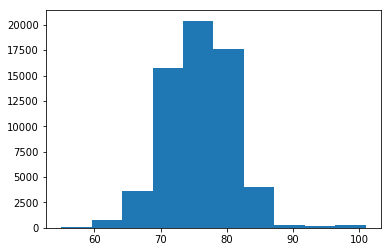

In [147]:
vals = [len(fastN._sequences)]
x = []
for i in [fastN._sequences[key] for key in fastN._sequences]:
    for j in [fastT._sequences[key] for key in fastT._sequences]:
        if len(i) == len(j):
            x.append([k for k in range(len(i)) if i[k] != j[k]])

x

plt.hist([len(vec) for vec in x])

n = 4
list(zip(*(x[i:] for i in range(n))))
# print("diffed:", len(x))

# table = {}
# for row in x:
#     for col in row:
#         if str(col) in table:
#             table[str(col)] += 1
#         else:
#             table[str(col)] = 0

# print(table)

# plt.hist([table[key] for key in table])